In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

import json
import glob
import os

In [2]:
base = "/amd.home/home/i11/zeitz/experiments/chpot/"
paths = glob.glob(base + "scaled_weights/*.json")
data = [json.load(open(path)) for path in paths]

In [3]:
queries = pd.DataFrame.from_records([{ 
    'weight_factor': exp['factor'], 
    'graph': run['args'][1],
    **algo } 
    for run in data for exp in run['experiments'] for algo in exp['algo_runs'] if algo.get('algo') == 'CH Potentials Query'])

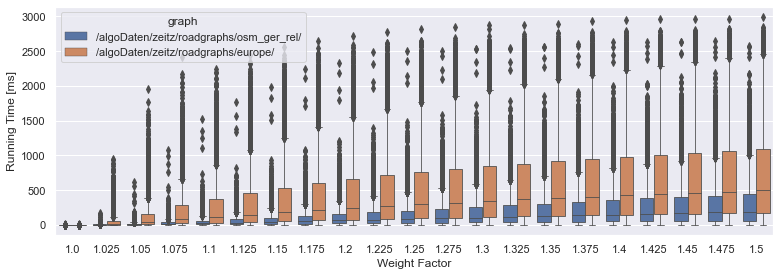

In [4]:
plt.figure(figsize=(11,4))
g = sns.boxplot(data=queries, x='weight_factor', y='running_time_ms', hue='graph', linewidth=0.8)
g.set_ylabel('Running Time [ms]')
g.set_xlabel('Weight Factor')
plt.tight_layout()
#g.get_figure().savefig('../paper/fig/scaled_weights.pdf')

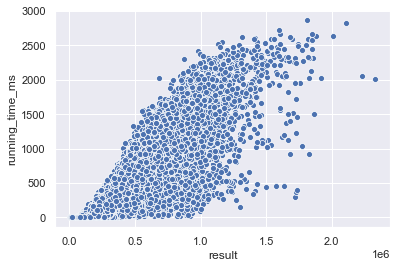

In [5]:
sns.scatterplot(data=queries.loc[lambda x: x['weight_factor'] == 1.3].loc[lambda x: x.graph == '/algoDaten/zeitz/roadgraphs/europe/'], x='result', y='running_time_ms')

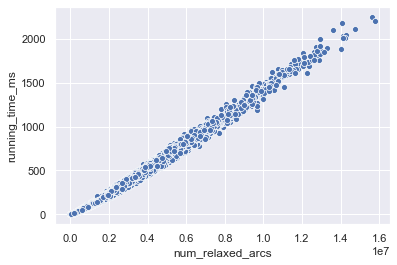

In [6]:
sns.scatterplot(data=queries.loc[lambda x: x['weight_factor'] == 1.1].loc[lambda x: x.graph == '/algoDaten/zeitz/roadgraphs/europe/'], x='num_relaxed_arcs', y='running_time_ms')

In [8]:
queries['increase'] = queries['result'] / queries['lower_bound']

In [9]:
queries.groupby(['graph', 'weight_factor'])['increase'].mean()

graph                                     weight_factor
/algoDaten/zeitz/roadgraphs/europe/       1.000            1.000000
                                          1.025            1.023276
                                          1.050            1.048320
                                          1.075            1.073258
                                          1.100            1.098402
                                          1.125            1.123452
                                          1.150            1.148263
                                          1.175            1.173263
                                          1.200            1.198579
                                          1.225            1.223277
                                          1.250            1.248672
                                          1.275            1.273255
                                          1.300            1.298402
                                          1.325            1